# Clustering

### What is clustering?  
Clustering is a unsupervised learning technique used to group objects into clusters taking into consideration their similarities.

### Types of clustering algorithms  
- K-Means clustering
- Spectral clustering 
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Hierarchical clustering

### Application on toy examples

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [2]:
%matplotlib inline

In [3]:
# Create dataset: Two concentric circles
def create_circles(n=100):
    features = []
    labels = []
    for i in range(n//2):
        t = 2*np.pi * i/(n//2)
        x, y = np.cos(t), np.sin(t)
        x, y = x+np.random.normal(0, .2), y+np.random.normal(0, .2)
        features.append([x, y])
        labels.append(0)
    for i in range(n//2, n):
        t = 2*np.pi * (i-n//2)/(n//2)
        x, y = 3*np.cos(t), 3*np.sin(t)
        x, y = x+np.random.normal(0, .2), y+np.random.normal(0, .2)
        features.append([x, y])
        labels.append(1)
    features = pd.DataFrame(features, columns=['x', 'y'])
    labels = pd.DataFrame(labels, columns=['label'])
    return features, labels

In [4]:
# Create dataset: Two blobs
def create_blobs(n=100):
    features = []
    labels = []
    for i in range(n//2):
        x, y = 1.5, 1.5
        x, y = x+np.random.normal(0, .5), y+np.random.normal(0, .5)
        features.append([x, y])
        labels.append(0)
    for i in range(n//2, n):
        x, y = -1.5, -1.5
        x, y = x+np.random.normal(0, .5), y+np.random.normal(0, .5)
        features.append([x, y])
        labels.append(1)
    features = pd.DataFrame(features, columns=['x', 'y'])
    labels = pd.DataFrame(labels, columns=['label'])
    return features, labels

In [5]:
dataset1 = create_circles(500)
dataset2 = create_blobs(500)

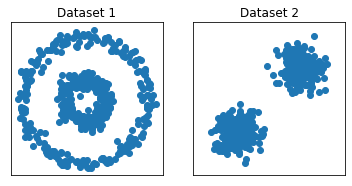

In [6]:
# PLot data points
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(dataset1[0]['x'] , dataset1[0]['y'])
ax1.set_title('Dataset 1')
ax1.set_aspect('equal')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.scatter(dataset2[0]['x'] , dataset2[0]['y'])
ax2.set_title('Dataset 2')
ax2.set_aspect('equal')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
plt.show()

The next step is using clustering algorithms found in the `sklearn` library. We will be comparing two algorithms: 
* the `Kmeans` algorithm which uses the more general Lloyd's algorithm
* the `DBSCAN` algorithm which is a density-based clustering algorithm 

In [7]:
models = [KMeans(n_clusters=2), DBSCAN()]

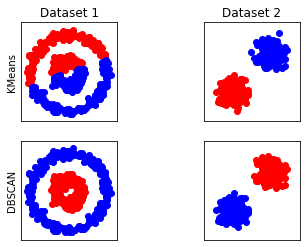

In [8]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True)
for model_idx, model in enumerate(models) :
    datasets = [dataset1, dataset2]
    for dataset_idx, dataset in enumerate(datasets):
        # Fit model
        labels = model.fit_predict(dataset[0])  
        first_class = dataset[0][labels==0]
        second_class = dataset[0][labels==1]
        # Display results
        ax[model_idx][dataset_idx].scatter(first_class['x'] , first_class['y'] , color = 'red')
        ax[model_idx][dataset_idx].scatter(second_class['x'] , second_class['y'] , color = 'blue')
        if model_idx == 0:
            ax[model_idx][dataset_idx].set_title('Dataset '+ str(dataset_idx+1))
        if dataset_idx == 0:
             ax[model_idx][dataset_idx].set_ylabel(type(model).__name__)
        ax[model_idx][dataset_idx].set_aspect('equal')
        ax[model_idx][dataset_idx].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 